In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

(200, 1)

Use `least_squares` to compute w, and visualize the results.

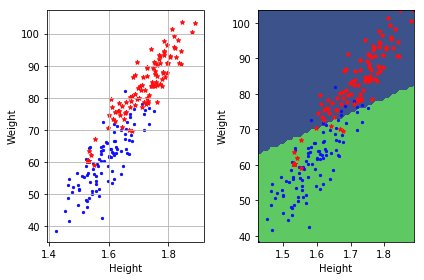

In [20]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx
        
    mse, w = least_squares(y,tx)
    
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    
    ex = np.exp(t)
    
    return ex / (ex + 1)

In [5]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    
    loss = 0
    
    for i in range(0 , len(y)):
        loss += np.log(1 + np.exp(np.dot(tx[i],w))) - y[i]*(np.dot(tx[i],w))
        
    return loss

In [6]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    

    return tx.T.dot(sigmoid(np.dot(tx,w)) - y)


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    g = calculate_gradient(y, tx, w)
    w = w - gamma*g
    return loss, w

Demo!

Current iteration=0, loss=[ 138.62943611]
Current iteration=100, loss=[ 43.46403231]
Current iteration=200, loss=[ 41.54589281]
Current iteration=300, loss=[ 41.09863897]
Current iteration=400, loss=[ 40.96487064]
Current iteration=500, loss=[ 40.92008946]
Current iteration=600, loss=[ 40.90418744]
Current iteration=700, loss=[ 40.89834995]
Current iteration=800, loss=[ 40.89616497]
Current iteration=900, loss=[ 40.89533753]
Current iteration=1000, loss=[ 40.89502196]
Current iteration=1100, loss=[ 40.89490109]
Current iteration=1200, loss=[ 40.89485466]
Current iteration=1300, loss=[ 40.8948368]
Current iteration=1400, loss=[ 40.89482992]
Current iteration=1500, loss=[ 40.89482727]
loss=[ 40.89482664]


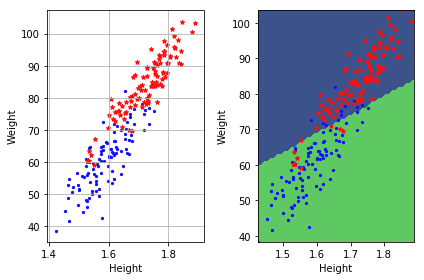

In [8]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [9]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    S = np.identity(len(y))
    
    for i in range(len(y)):
        xtw = tx[i].T.dot(w)
        S[i, i] = sigmoid(xtw) * ( 1 - sigmoid(xtw))
    
    ret = tx.T.dot(S)
    return ret.dot(tx)

Write a function below to return loss, gradient, and hessian.

In [10]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    return calculate_loss(y, tx, w), calculate_gradient(y, tx, w), calculate_hessian(y, tx, w)

### Using Newton's method
Use Newton's method for logistic regression.

In [11]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)    
    w = w - np.dot(np.linalg.inv(hessian), gradient)
    return loss, w

demo

(3, 1)
Current iteration=0, the loss=[ 138.62943611]
(3, 1)
Current iteration=1, the loss=[ 63.41155374]
(3, 1)
Current iteration=2, the loss=[ 47.3045862]
(3, 1)
Current iteration=3, the loss=[ 41.99746742]
(3, 1)
Current iteration=4, the loss=[ 40.95639864]
(3, 1)
Current iteration=5, the loss=[ 40.89511994]
(3, 1)
Current iteration=6, the loss=[ 40.89482562]
(3, 1)
Current iteration=7, the loss=[ 40.89482561]
loss=[ 40.89482561]


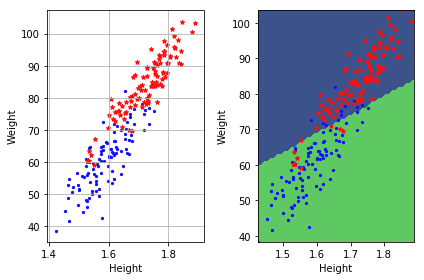

In [39]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    
    
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        
        print(np.shape(w))

        
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [13]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    
    loss = calculate_loss(y, tx, w)
    
    loss += 0.5 * lambda_ * np.linalg.norm(w) ** 2
    
    g = calculate_gradient(y, tx, w)
    
    g += lambda_ * w
    
    hessian = calculate_hessian(y, tx, w)
    
    hessian +=  0.5 * lambda_ * np.linalg.norm(w) ** 2
    
    return loss, g, hessian

In [14]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    
    loss, g, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    
    w = w - gamma*g
    
    
    return loss, w

Current iteration=0, loss=[ 138.62943611]
Current iteration=100, loss=[ 56.7978758]
Current iteration=200, loss=[ 52.82352615]
Current iteration=300, loss=[ 50.3326799]
Current iteration=400, loss=[ 48.50185562]
Current iteration=500, loss=[ 47.10969485]
Current iteration=600, loss=[ 46.03077236]
Current iteration=700, loss=[ 45.1812882]
Current iteration=800, loss=[ 44.50306157]
Current iteration=900, loss=[ 43.95486882]
Current iteration=1000, loss=[ 43.50696339]
Current iteration=1100, loss=[ 43.13750225]
Current iteration=1200, loss=[ 42.83018105]
Current iteration=1300, loss=[ 42.57264469]
Current iteration=1400, loss=[ 42.35540089]
Current iteration=1500, loss=[ 42.17106499]
Current iteration=1600, loss=[ 42.01382626]
Current iteration=1700, loss=[ 41.87906496]
Current iteration=1800, loss=[ 41.7630735]
Current iteration=1900, loss=[ 41.66285074]
Current iteration=2000, loss=[ 41.57594827]
Current iteration=2100, loss=[ 41.50035425]
Current iteration=2200, loss=[ 41.43440467]
Cur

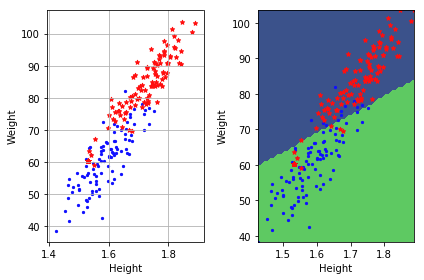

In [50]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.001
    lambda_ = 0.001
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            print(w)
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)

In [41]:
# init parameters
max_iter = 10000
gamma = 0.01
lambda_ = 0.001
threshold = 1e-8
losses = []

# build tx
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))


In [45]:
np.shape(tx)

(200, 3)

In [48]:
np.shape(x)

(200, 2)